# Part 1

## Import Data

In [3]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from from_root import from_root
import os

In [4]:
# Set display size
pd.set_option('display.max_rows', None)

In [6]:
# login data file path
login_data_path = os.path.join(from_root(),"data/logins.json")

In [7]:
#Load the dataset to a pandas dataframe
login_df = pd.read_json(login_data_path)

In [8]:
#Look at the first few rows of the dataset
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## Data Wrangling

**The dataset is not sorted by the login time. We will sort the dataset by ascending order.**

In [9]:
# Sort the records of the dataset by login_time
login_df_sorted = login_df.sort_values('login_time')

In [10]:
login_df_sorted.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


**Determine the start time and end time of the whole dataset.**

In [11]:
print(login_df_sorted['login_time'].min(), " | ",login_df_sorted['login_time'].max())

1970-01-01 20:12:16  |  1970-04-13 18:57:38


In [12]:
#Create 'date' and 'time' columns.
login_df_sorted['date'] = login_df_sorted['login_time'].dt.date
login_df_sorted['time'] = login_df_sorted['login_time'].dt.time

We split each day into 15-min periods.
Each day will have 96 intervals, start from 00:00:00 to 23:45:00
We will then assign each login to a corressponding interval.

In [13]:
#Create a list of time interval during a day with 15 minutes interval.
#Define start and end times
start_time = datetime.strptime('00:00:00', '%H:%M:%S')
end_time = datetime.strptime('23:59:59', '%H:%M:%S')

# Create a list of times with 15-minute intervals
time_list = []
current_time = start_time
while current_time <= end_time:
    time_list.append(current_time.strftime('%H:%M:%S'))
    current_time += timedelta(minutes=15)

In [14]:
def convert_interval_to_time(interval):
    """
    Converts a time interval index to a time of day.

    This function takes an interval index (e.g., 0, 1, 2, ...) and converts it 
    to a corresponding time of day, assuming each interval represents a 15-minute duration. 
    The time starts at 00:00 (midnight), and each interval index is used to calculate 
    the offset from this start time.

    Args:
        interval (int): The interval index, where each step represents a 15-minute increment from 00:00.

    Returns:
        timedelta: A timedelta object representing the time of day based on the interval.
    """
    interval_duration = timedelta(minutes=15)
    start_time = timedelta(hours=0, minutes=0)  # 00:00:00
    time = start_time + interval * interval_duration
    return time

In [15]:
def determine_time_interval(date):
    """
    Determines the 15-minute time interval index for a given time of day.

    Each day is divided into 96 intervals, each representing 15 minutes, starting from 00:00:00 (midnight) 
    and ending at 23:59:00. This function takes a datetime object as input and returns the 
    corresponding time interval (from 0 to 95) that the given time belongs to.

    Args:
        date (datetime): A datetime object representing the date and time.

    Returns:
        timedelta: A timedelta object representing the start time of the interval that the input time falls into.
    """
    # Calculate time interval size in minutes
    total_intervals = 96
    interval_duration = 24 * 60 // total_intervals  # 24 hours in minutes

    # Get the time from the datetime object
    time = date.time()

    # Calculate the time in minutes
    total_minutes = time.hour * 60 + time.minute

    # Calculate the interval the time belongs to
    interval = total_minutes // interval_duration

    return convert_interval_to_time(interval)


**For each record, we add an interval column that indicates the time interval of the day to which the record belongs.**

In [16]:
login_df_sorted['interval'] = login_df_sorted['login_time'].apply(determine_time_interval)

In [17]:
# Take a look at the new dataframe
login_df_sorted.head()

,login_time,date,time,interval
6,1970-01-01 20:12:16,1970-01-01,20:12:16,0 days 20:00:00
0,1970-01-01 20:13:18,1970-01-01,20:13:18,0 days 20:00:00
1,1970-01-01 20:16:10,1970-01-01,20:16:10,0 days 20:15:00
3,1970-01-01 20:16:36,1970-01-01,20:16:36,0 days 20:15:00
2,1970-01-01 20:16:37,1970-01-01,20:16:37,0 days 20:15:00


## Count the number of logins by each time interval of a day

**We count the number of logins by each time interval of a day.**

In [18]:
login_count_df = login_df_sorted.groupby(['date', 'interval'], as_index=False).count().drop(columns=['login_time'])

In [19]:
# Rename columns with appropriate names
login_count_df.rename(columns={'time':'count'}, inplace=True)

In [21]:
# Take a look at the new dataframe
login_count_df.head(50)

,date,interval,count
0,1970-01-01,0 days 20:00:00,2
1,1970-01-01,0 days 20:15:00,6
2,1970-01-01,0 days 20:30:00,9
3,1970-01-01,0 days 20:45:00,7
4,1970-01-01,0 days 21:00:00,1
5,1970-01-01,0 days 21:15:00,4
6,1970-01-01,0 days 21:45:00,4
7,1970-01-01,0 days 22:00:00,9
8,1970-01-01,0 days 22:15:00,8
9,1970-01-01,0 days 22:30:00,1


In [22]:
# Convert 'date' column to DateTime format
login_count_df['date'] = pd.to_datetime(login_count_df['date'])

In [23]:
# Merge 'date' and 'interval' into a new DateTime index
login_count_df['datetime'] = login_count_df['date'] + pd.to_timedelta(login_count_df['interval'])
login_count_df.set_index('datetime', inplace=True)

In [25]:
# Take a look at the new dataframe
login_count_df.head(30)

,date,interval,count
datetime,,,
1970-01-01 20:00:00,1970-01-01,0 days 20:00:00,2
1970-01-01 20:15:00,1970-01-01,0 days 20:15:00,6
1970-01-01 20:30:00,1970-01-01,0 days 20:30:00,9
1970-01-01 20:45:00,1970-01-01,0 days 20:45:00,7
1970-01-01 21:00:00,1970-01-01,0 days 21:00:00,1
1970-01-01 21:15:00,1970-01-01,0 days 21:15:00,4
1970-01-01 21:45:00,1970-01-01,0 days 21:45:00,4
1970-01-01 22:00:00,1970-01-01,0 days 22:00:00,9
1970-01-01 22:15:00,1970-01-01,0 days 22:15:00,8


## Time Series EDA

### Create Time Series Plots

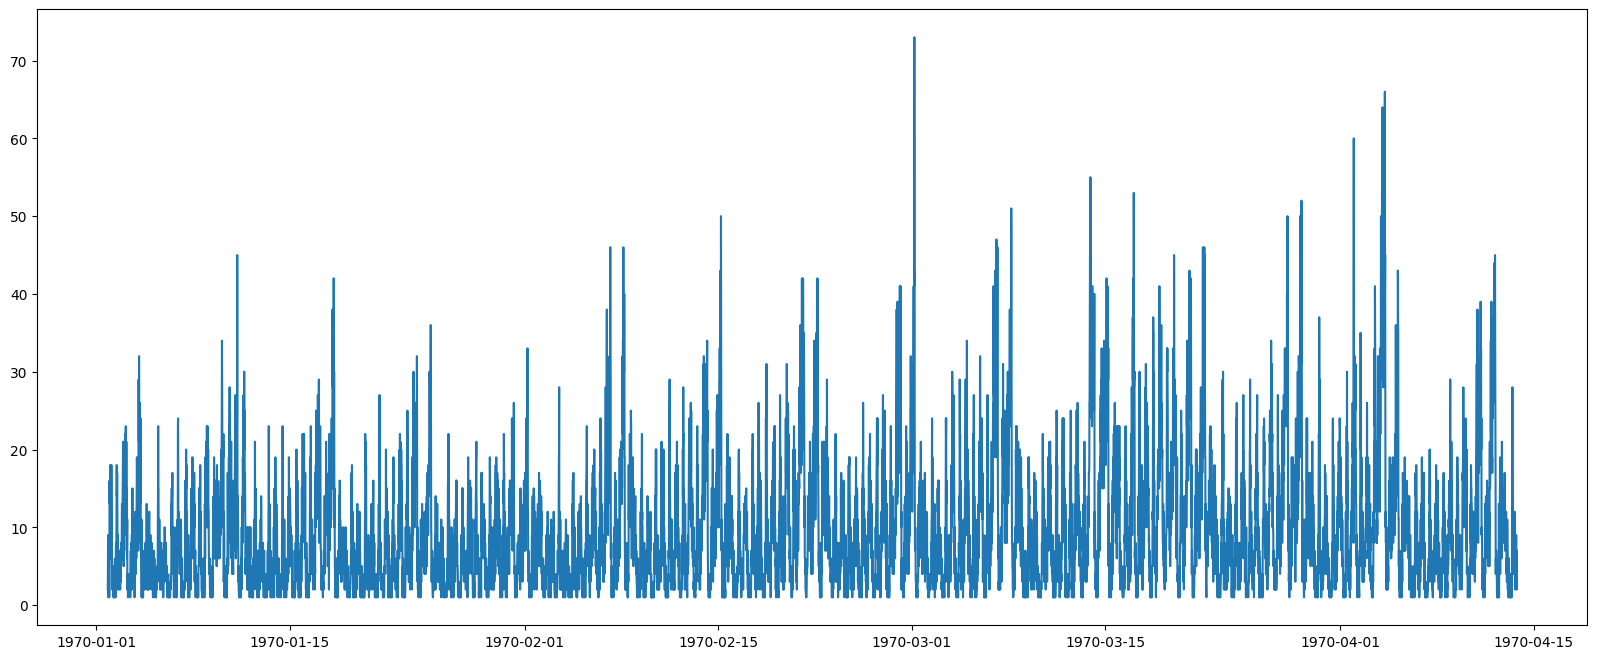

In [26]:
#Create a time series plot for the whole dataset
plt.figure(figsize=(20,8))
plt.plot(login_count_df.index, login_count_df['count'], )

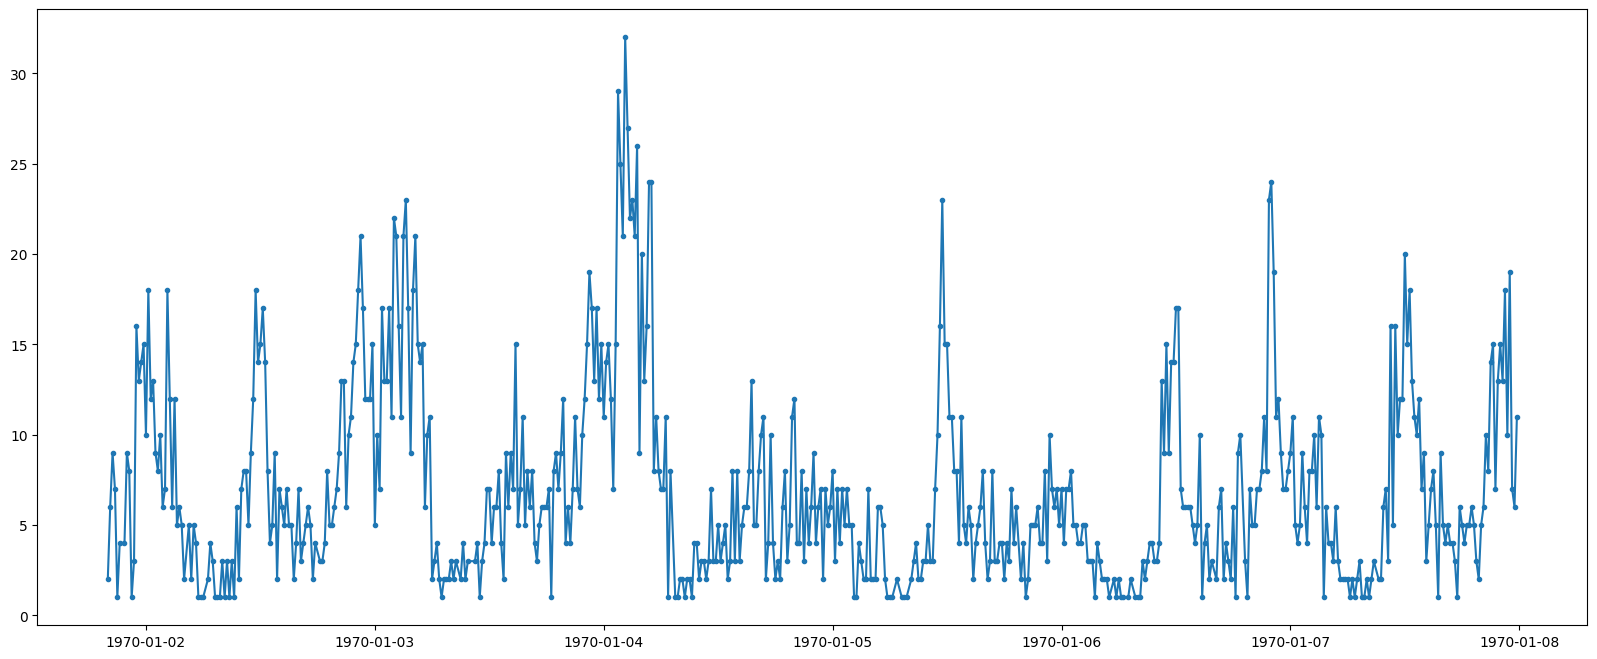

In [27]:
#Create a time series plot for 7 days
plt.figure(figsize=(20,8))
plt.plot(login_count_df[login_count_df['date'] < '1970-01-08']['count'], marker='.')

### Descriptive Statistic for Number of Login

In [30]:
login_count_df['count'].describe()

count    9381.000000
mean        9.928792
std         8.263146
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        73.000000
Name: count, dtype: float64

<Axes: ylabel='count'>

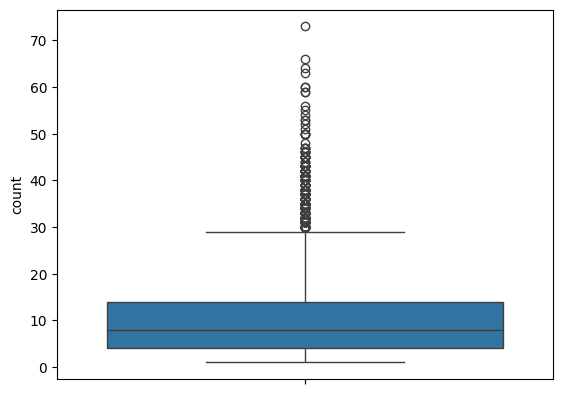

In [32]:
# Boxplot of login count
sns.boxplot(login_count_df['count'])

### Data insights

**We will look at the login pattern for each time interval of a day.**

In [33]:
login_25, login_50, login_75 = login_count_df['count'].quantile([0.25, 0.5, 0.75])

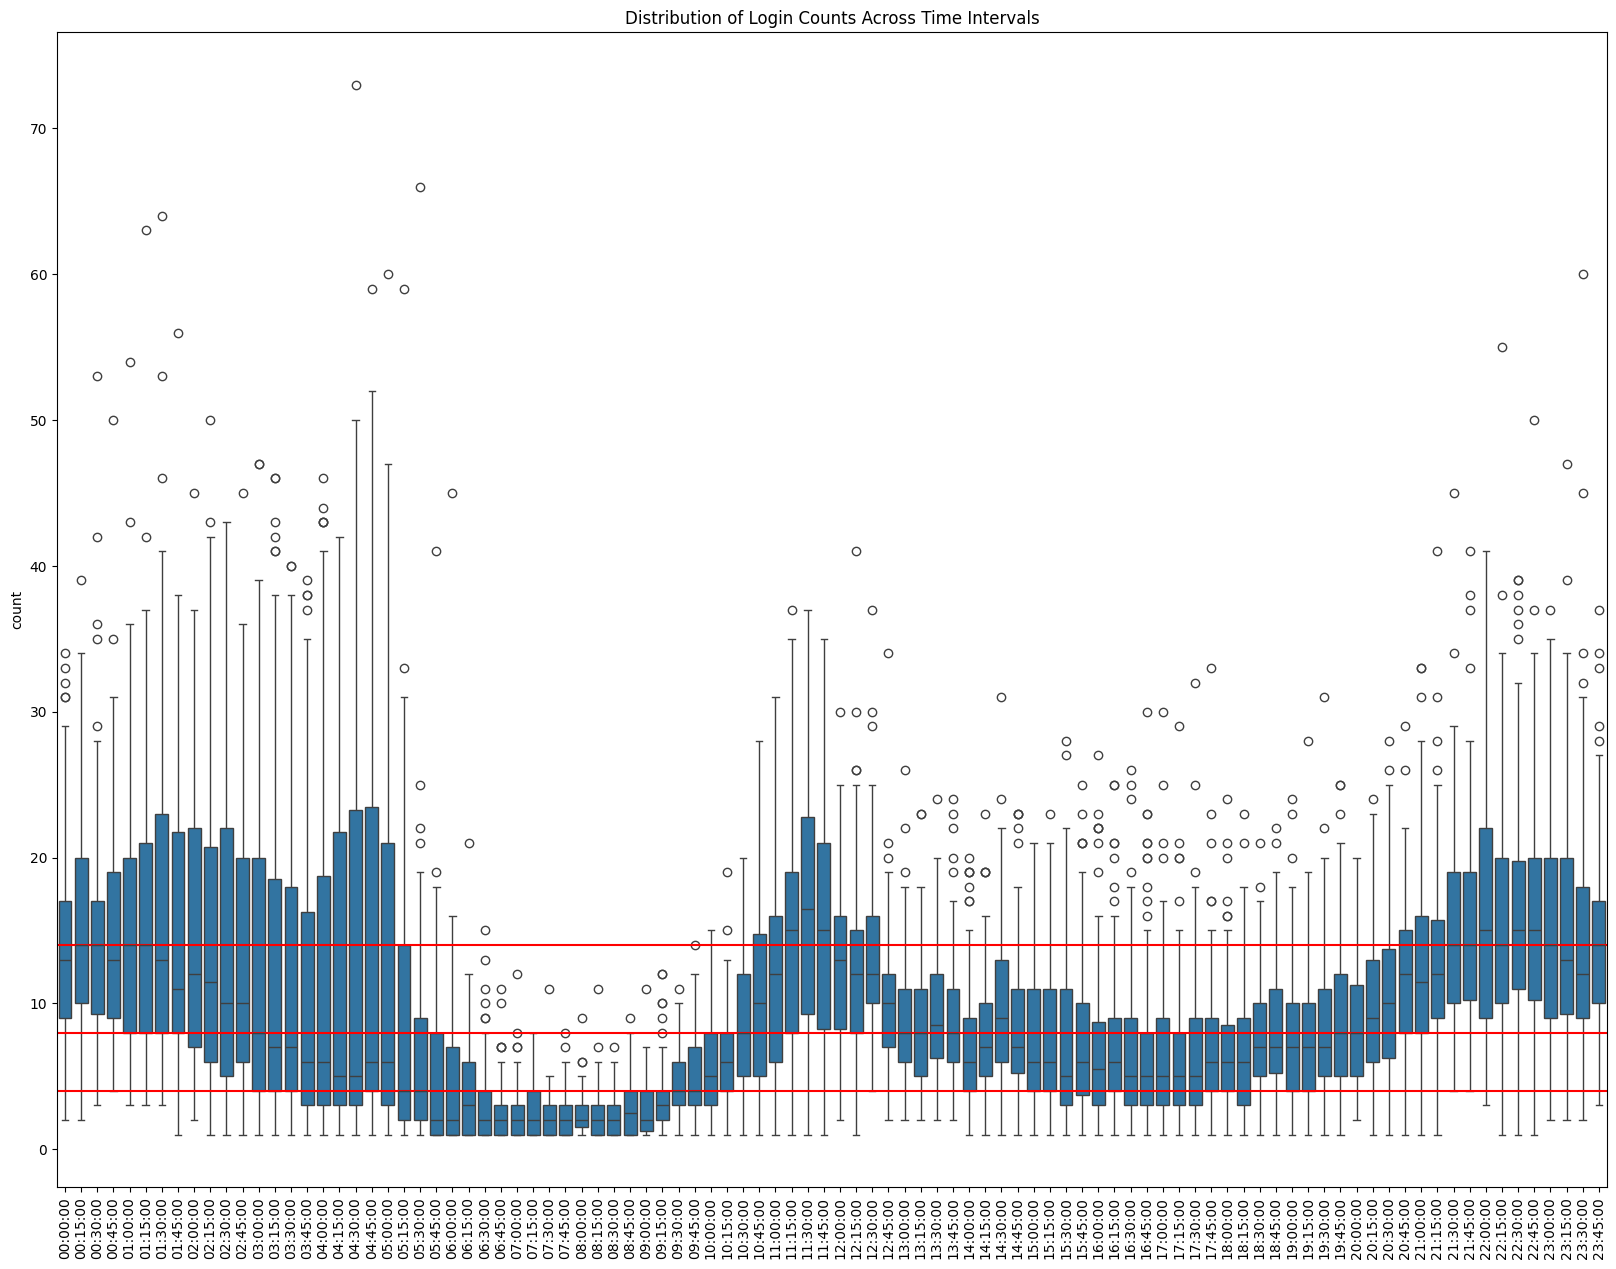

In [38]:
#Create boxplot for each time interval
plt.figure(figsize=(20,15))
graph = sns.boxplot(data=login_count_df, x=login_count_df.index.time, y='count', order=time_list)
graph.axhline(login_25, color='r')
graph.axhline(login_50, color='r')
graph.axhline(login_75, color='r')
plt.xticks(rotation=90)
graph.set_title('Distribution of Login Counts Across Time Intervals')
plt.show()

**From the boxplot, we can see that there are 2 periods during a day that have high logins.**
> * From around 00:00 to 03:00
> * From around 10:30 to 13:00
> * From around 22:00 to 00:00

**We'll then look at the login pattern by the day of a week.**

In [35]:
login_count_df['day_of_week'] = login_count_df.index.day_name()

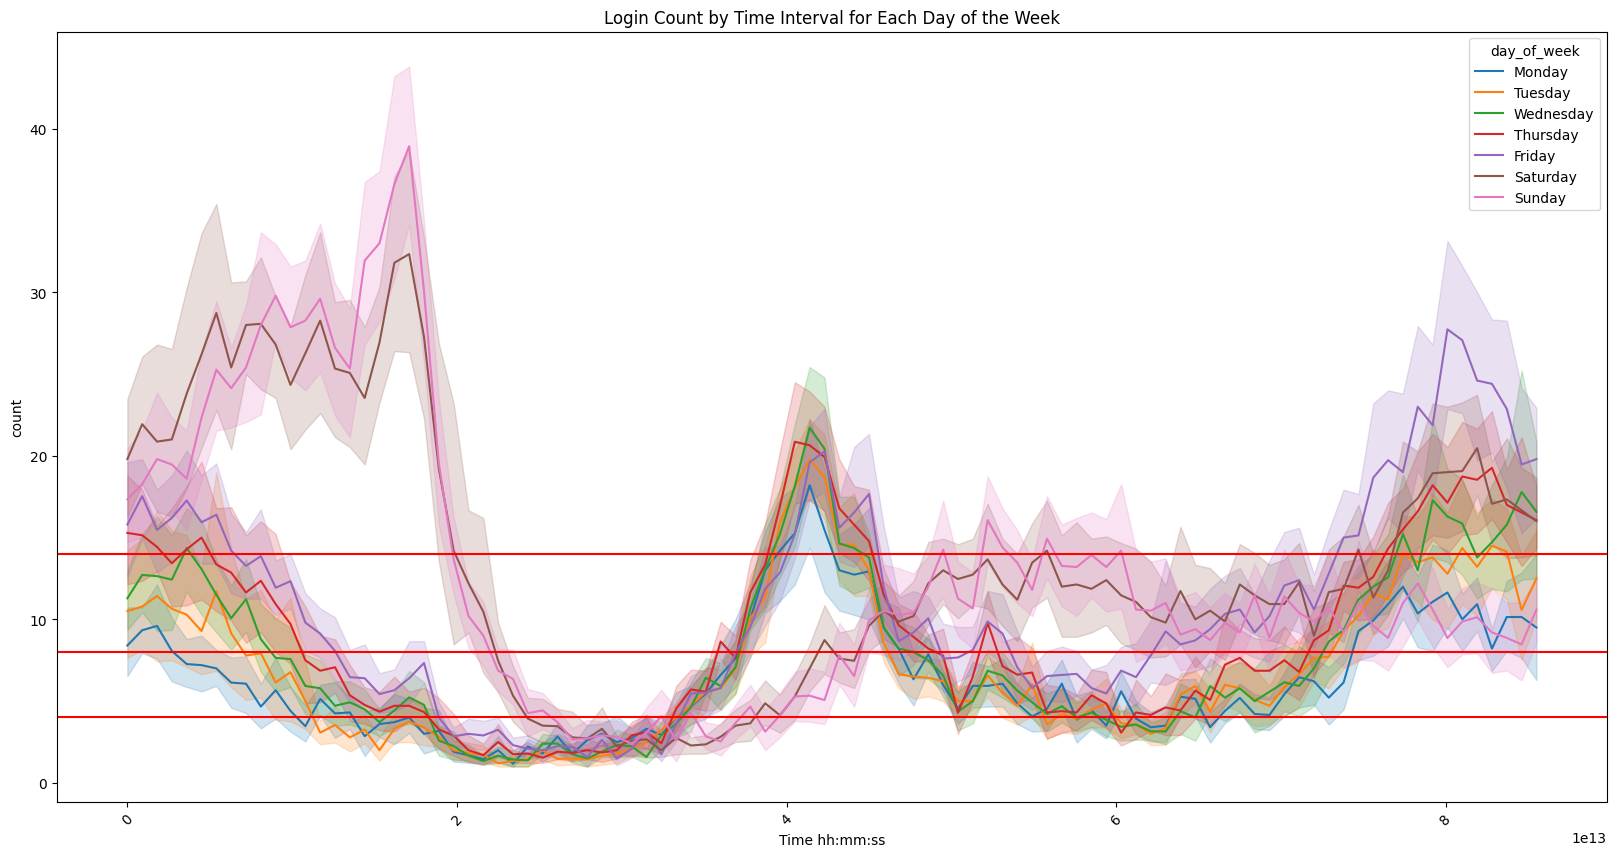

In [37]:
plt.figure(figsize=(20, 10))
graph = sns.lineplot(data=login_count_df, x='interval', y='count', hue='day_of_week',
          hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
graph.axhline(login_25, color='r')
graph.axhline(login_50, color='r')
graph.axhline(login_75, color='r')
plt.xlabel('Time hh:mm:ss')
plt.xticks(rotation=45)
graph.set_title('Login Count by Time Interval for Each Day of the Week')
plt.show()

**We'll create boxplot for each day of a week.**

In [39]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

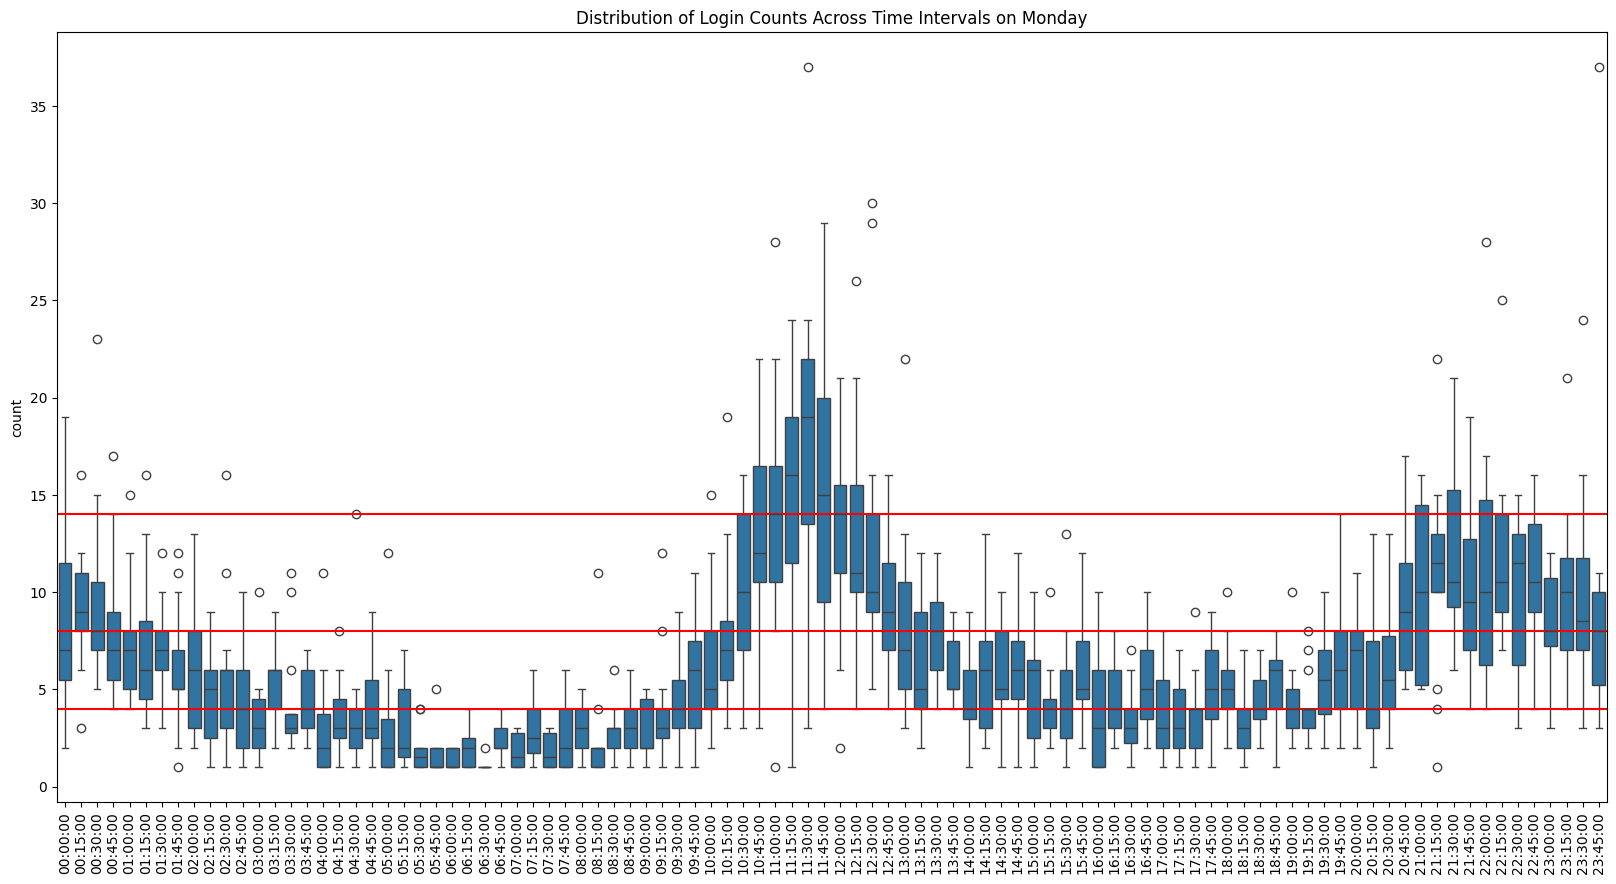

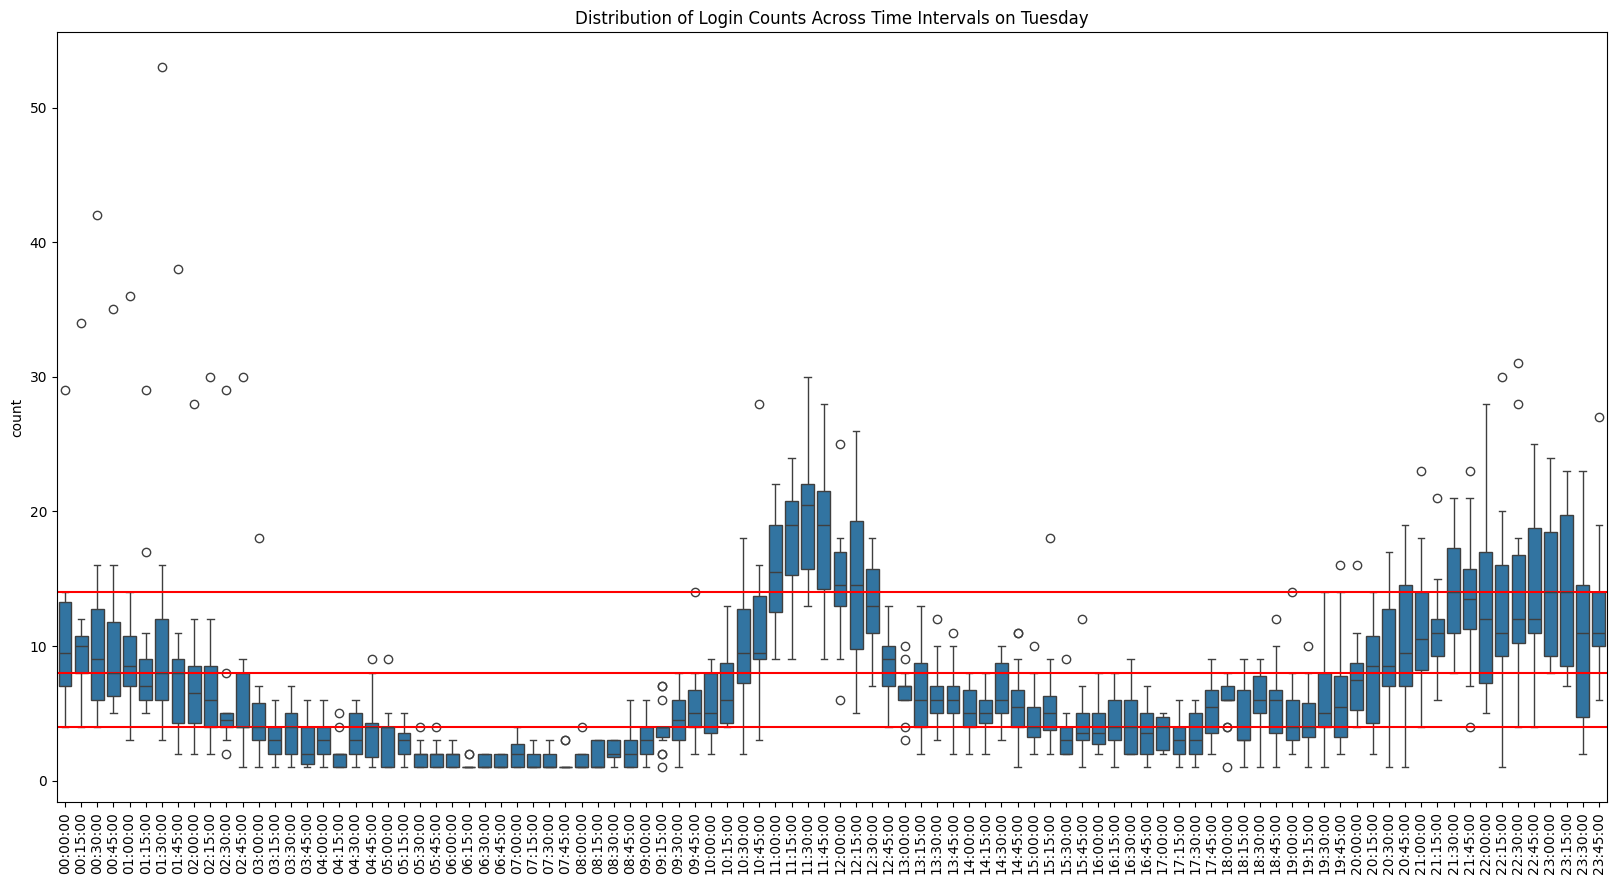

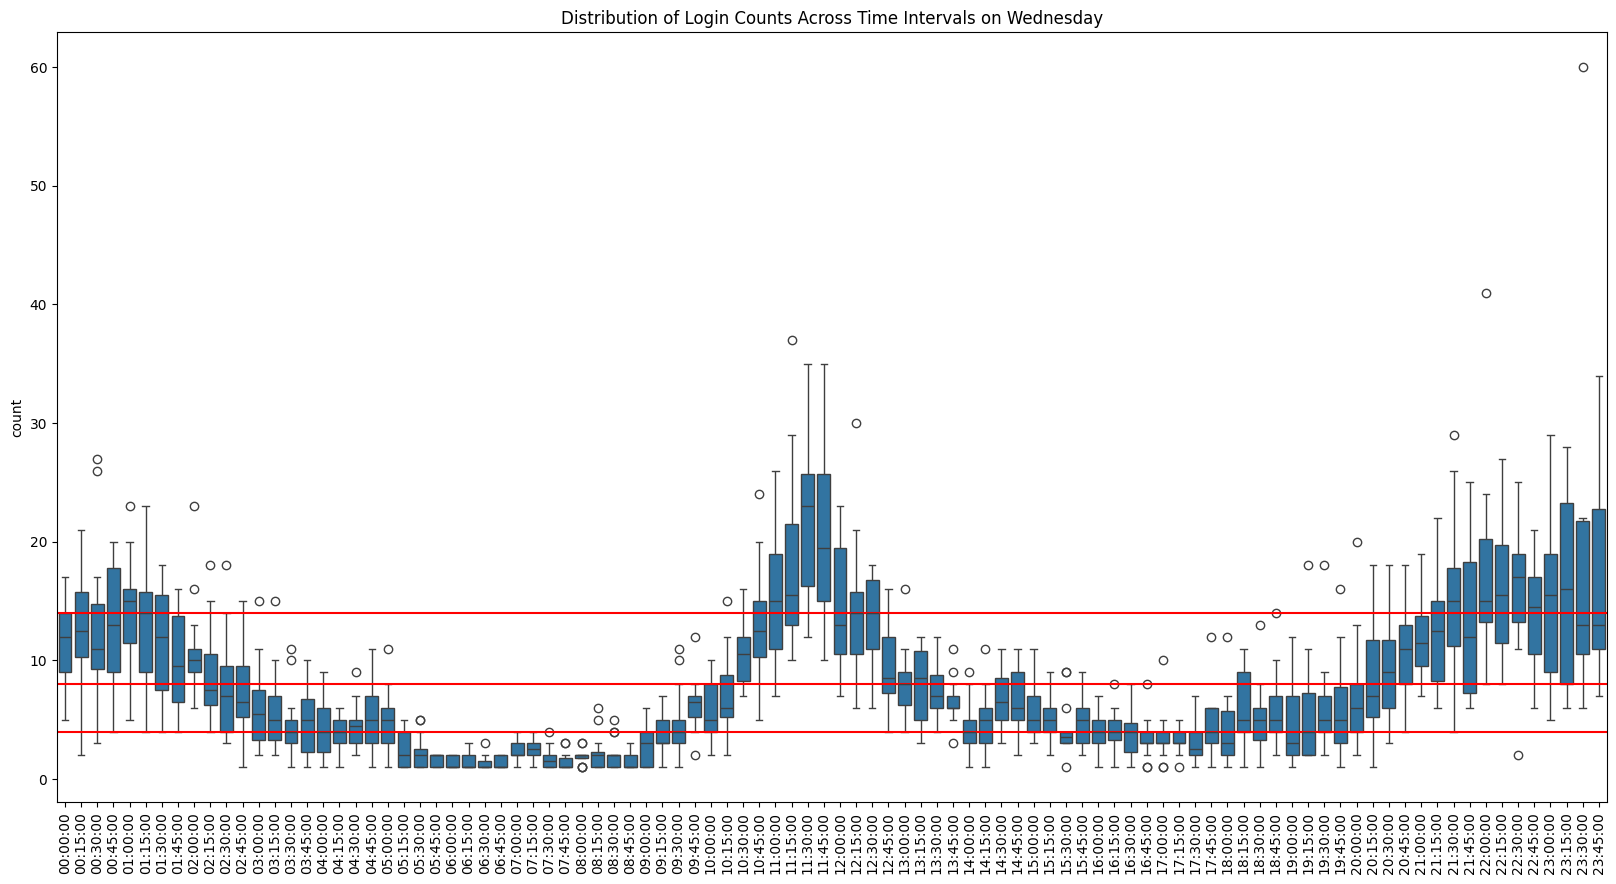

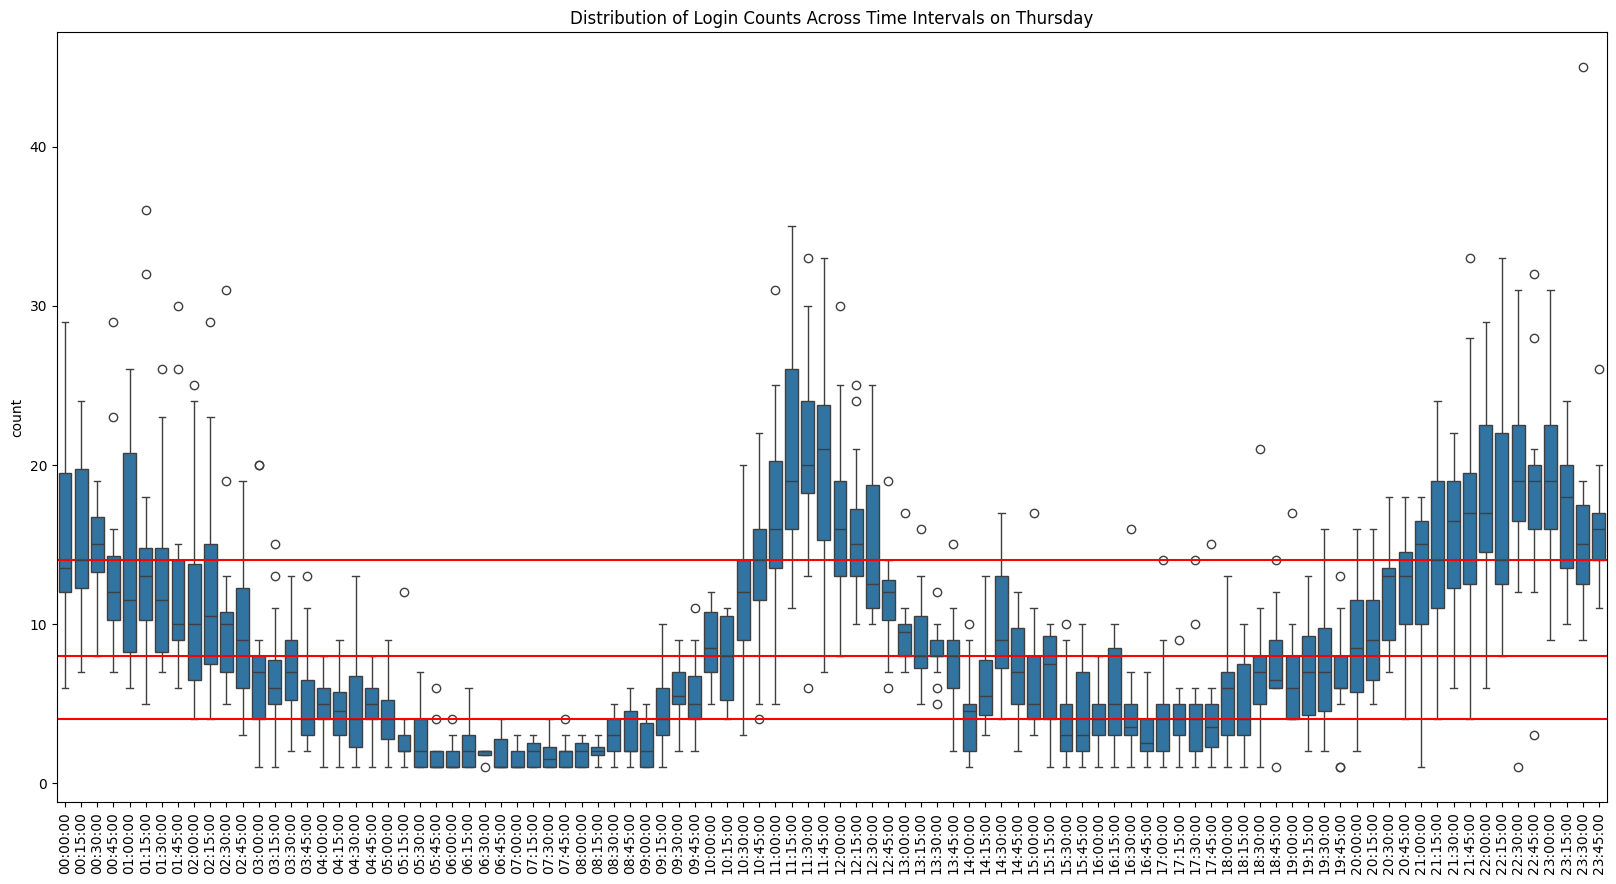

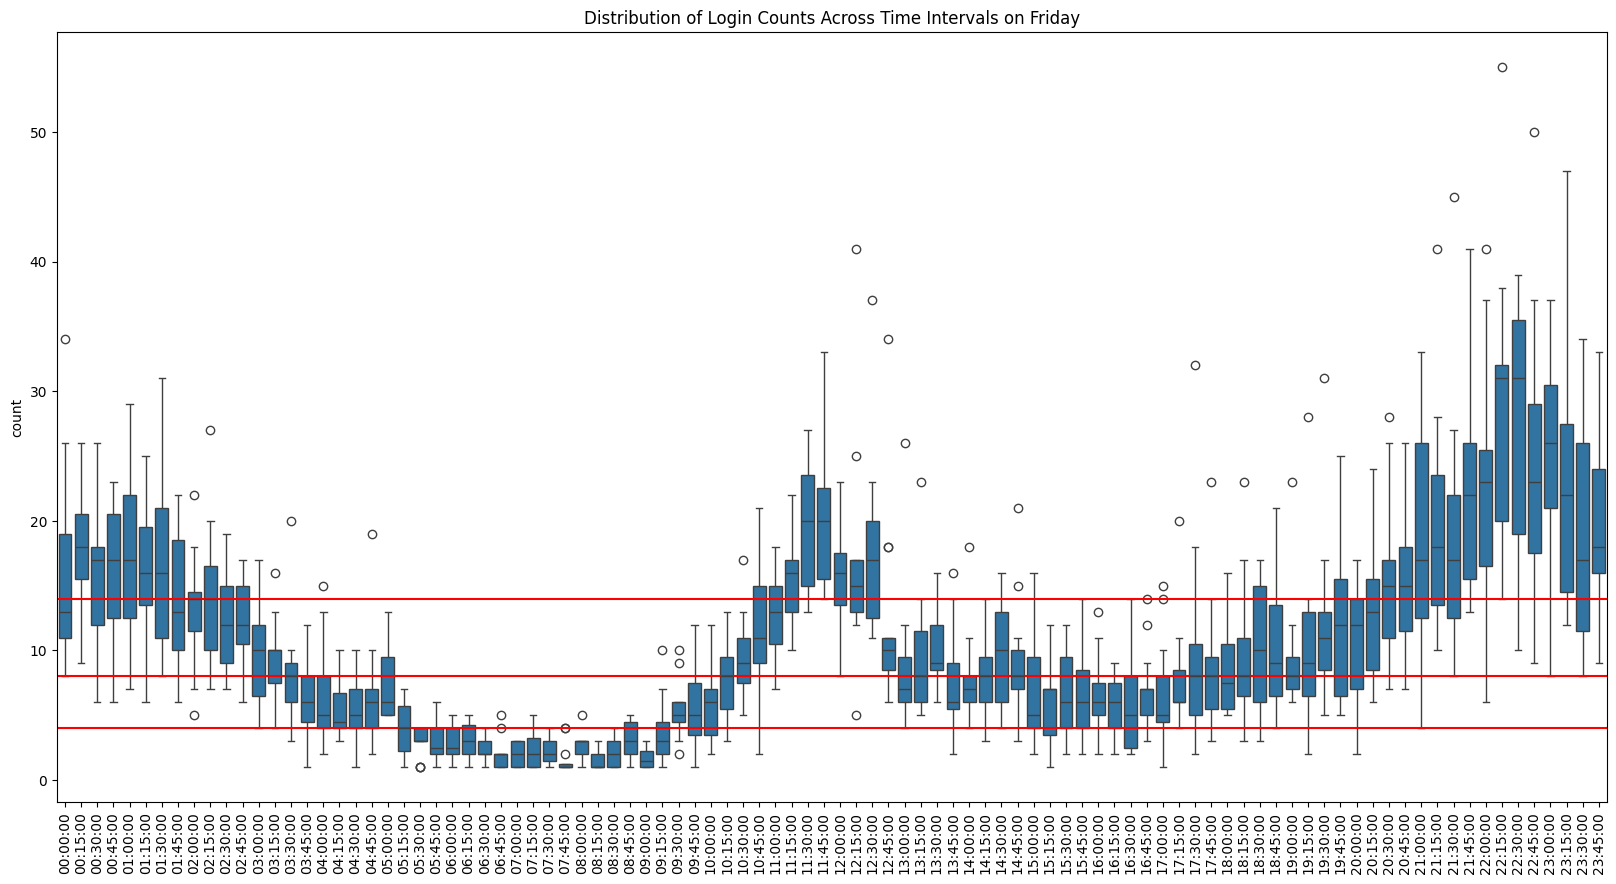

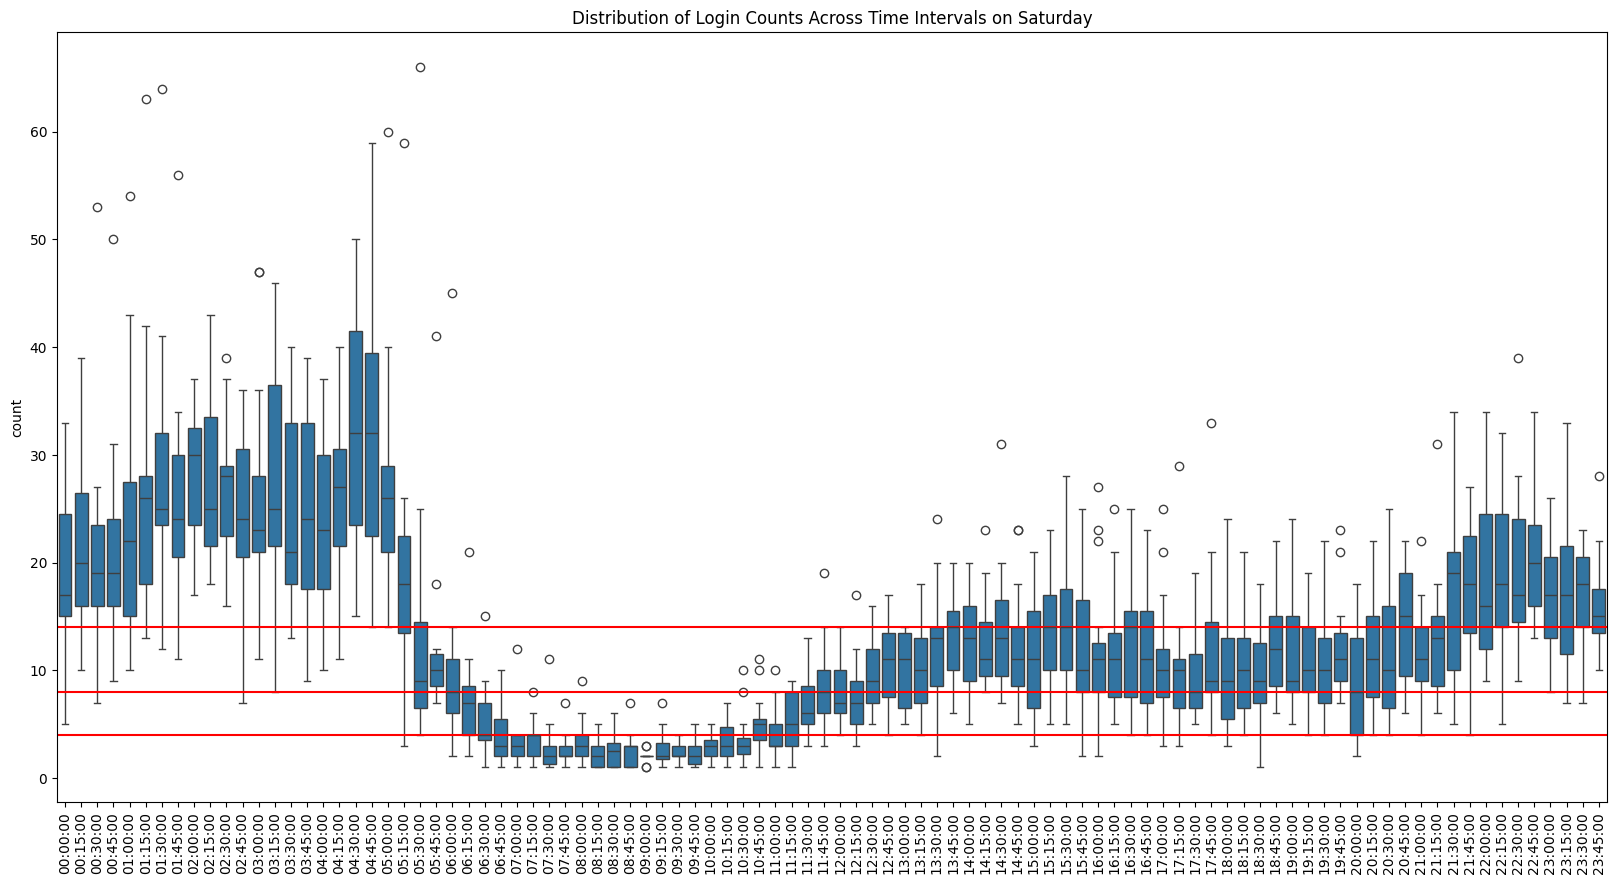

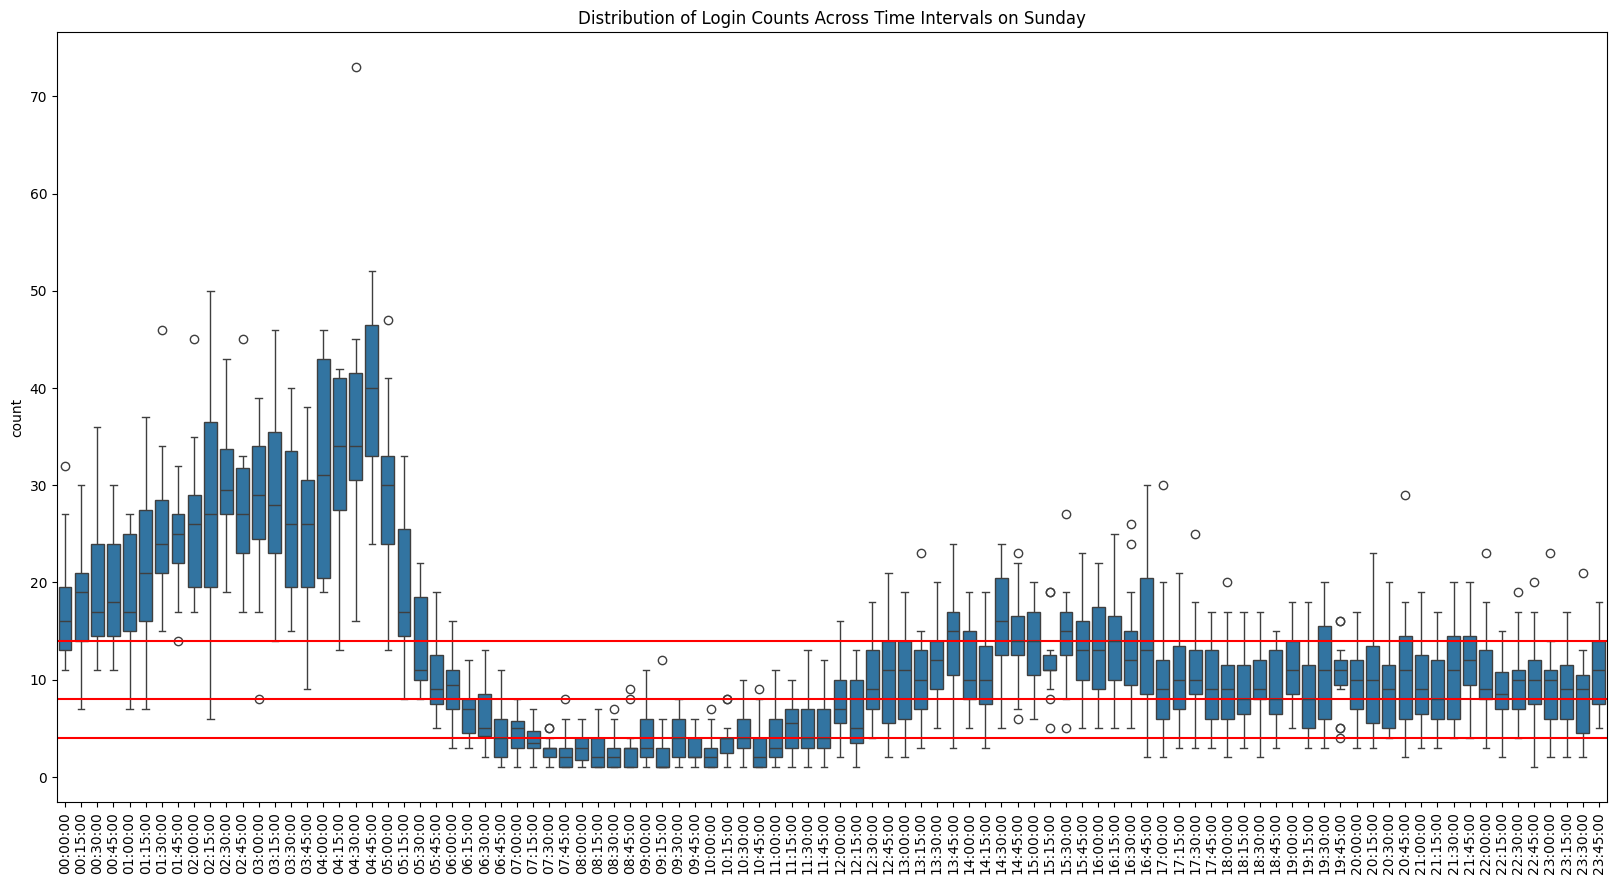

In [40]:
for day in weekday:
    plt.figure(figsize=(20, 10))
    data=login_count_df[login_count_df['day_of_week']==day]
    graph = sns.boxplot(data=data, x=data.index.time, y='count', order=time_list)
    graph.axhline(login_25, color='r')
    graph.axhline(login_50, color='r')
    graph.axhline(login_75, color='r')
    plt.title('{}'.format(day))
    plt.xticks(rotation=90)
    graph.set_title('Distribution of Login Counts Across Time Intervals on {}'.format(day))
    plt.show()

**There are some interesting insights from the boxplot for each day of the week.**

> The login patterns are quite similiar for weekdays, which peaks around noon and night. Friday has higher peak at night than the other weekdays.
>
> This pattern is quite reasonable. The peak at noon maybe because it is lunch time, so people tend to ride more. The Friday night and Saturday night peak maybe because it is the time that most people going out during the week.
>
> Saturday and Sunday have different patterns with the other weekdays. The peaks are around 00:00 to 06:00.

# Part 2

**Key Measure of Success:**

The primary metric to measure the success of encouraging driver partners to serve both cities would be the increase in the number of drivers crossing the toll bridge. The goal is to achieve a significant rise in the frequency of drivers traversing between the cities. This metric directly reflects the adoption of reimbursing toll costs and the willingness of driver partners to work in both cities, thus addressing the issue of exclusive city operations.

**Practical Experiment Design:**

> a) **Implementation:** A practical experiment could involve two phases. In the first phase, you would collect data on the number of drivers crossing the toll bridge before the reimbursement policy is implemented. The second phase would entail implementing the toll reimbursement policy and collecting data after the policy is in place.

> b) **Statistical Test(s):** A hypothesis test can be conducted to compare the means of the number of drivers crossing the toll bridge before and after the policy change. A two-sample t-test or a z-test, depending on the data distribution and sample size, could be used to determine whether the mean difference is statistically significant.

> c) **Interpreting Results and Recommendations:** If the hypothesis test shows a statistically significant increase in the number of drivers crossing the toll bridge after the policy implementation, it would suggest that the reimbursement policy has been effective in encouraging driver partners to serve both cities. Recommendations could include the continuation of the policy and even extending it to other city services, promoting inter-city collaborations. However, it is crucial to consider any confounding variables, external factors, or changes in traffic patterns, as they could influence the results.

**Note**
This experiment should be conducted over a reasonable duration to capture potential variations in traffic patterns, account for seasonal changes, and obtain a more robust understanding of the impact of the policy change.